# Task 5
## Cradit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

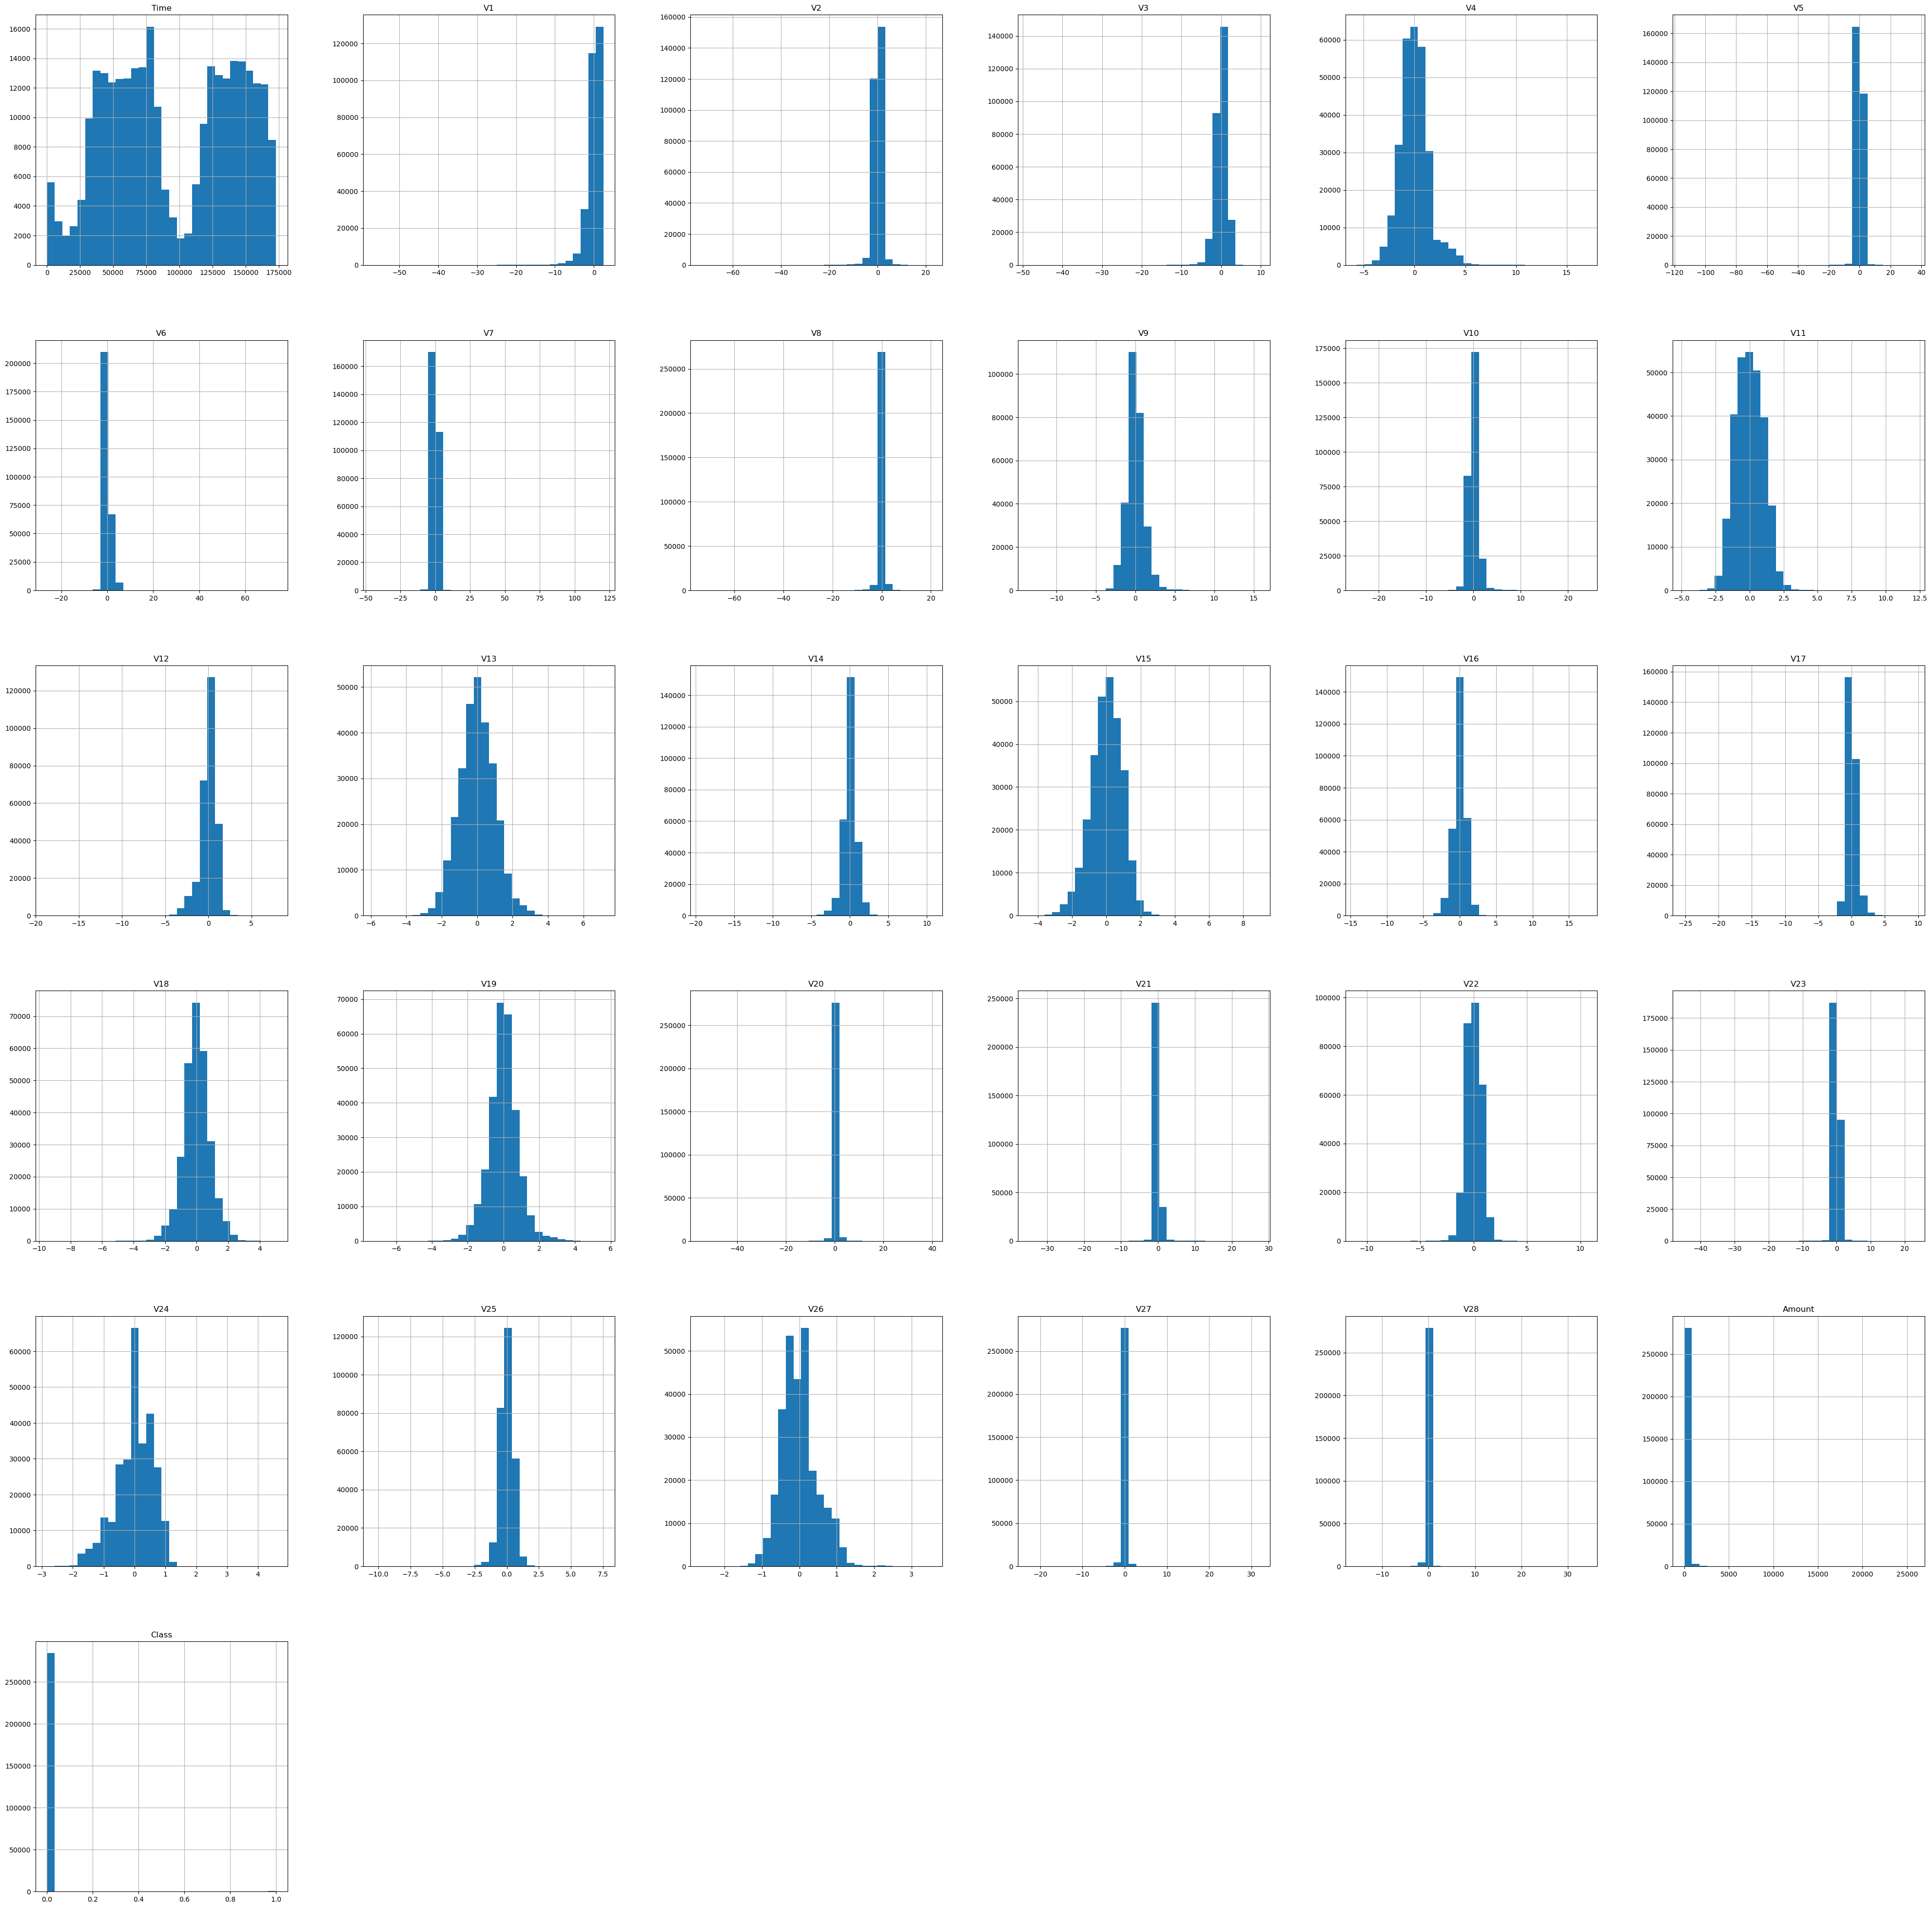

In [5]:
data.hist(bins=30, figsize=(50,50))

In [6]:
data[["Time","Amount"]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [7]:
from sklearn.preprocessing import StandardScaler
data["Amount"]= StandardScaler().fit_transform(data["Amount"].values.reshape(-1, 1))
data["Time"]= StandardScaler().fit_transform(data["Time"].values.reshape(-1, 1))

In [8]:
data[["Time","Amount"]].describe()

,Time,Amount
count,2.848070e+05,2.848070e+05
mean,-3.065637e-16,2.913952e-17
std,1.000002e+00,1.000002e+00
min,-1.996583e+00,-3.532294e-01
25%,-8.552120e-01,-3.308401e-01
50%,-2.131453e-01,-2.652715e-01
75%,9.372174e-01,-4.471707e-02
max,1.642058e+00,1.023622e+02


In [9]:
X = data.drop("Class", axis=1)
y = data["Class"].values.reshape(-1,1)

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [11]:
from sklearn.model_selection import train_test_split
X_train_resampled,X_test,y_train_resampled,y_test= train_test_split(X_resampled,y_resampled)

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred=model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     71273
           1       0.97      0.92      0.95     70885

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158



In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9476359776105302

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9743152732926683
0.9193764548211892


In [16]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9460489355679268

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_resampled, y_train_resampled)
y_pred2 = sgd_clf.predict(X_test)

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred2)

0.9476781460846297

In [19]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.9743743085249529
0.9194046695351625


In [20]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred2)

0.9460917028982877